In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\PARNA MISHRA\Downloads\food_truck_data (1).txt")

In [5]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.isnull().sum()

Population    0
Profit        0
dtype: int64

In [22]:
X = df['Population'].values.reshape(-1, 1)
y = df['Profit'].values.reshape(-1, 1)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
class SimpleLinearRegression:
    def __init__(self):
        self.coefficient = None
        self.intercept = None

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.coefficient = numerator / denominator
        self.intercept = y_mean - self.coefficient * x_mean

    def predict(self, X):
        return self.coefficient * X + self.intercept

    def calculate_cost(self, X, y):
        predictions = self.predict(X)
        return np.mean((y - predictions) ** 2)


In [25]:
model = SimpleLinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print("Custom Model Coefficients:", model.coefficient)
print("Custom Model Intercept:", model.intercept)
print("Custom Model MSE:", model.calculate_cost(X, y))

Custom Model Coefficients: 1.193033644189594
Custom Model Intercept: -3.8957808783118537
Custom Model MSE: 8.953942751950356


In [27]:
model.predict(10)

8.034555563584085

In [28]:
df.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


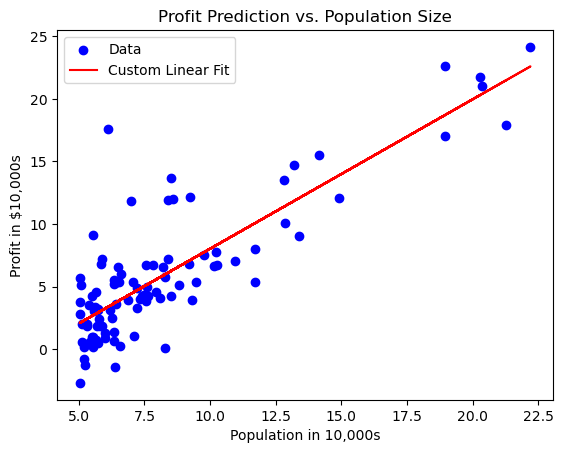

In [29]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predictions, color='red', label='Custom Linear Fit')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit Prediction vs. Population Size')
plt.legend()
plt.show()

NOW USING SKLEARN

In [32]:
from sklearn.linear_model import LinearRegression
sk_model=LinearRegression()
from sklearn.metrics import mean_squared_error

In [33]:
sk_model.fit(X, y)
sk_predictions = sk_model.predict(X)
print("Scikit-Learn LinearRegression Coefficients:", sk_model.coef_[0])
print("Scikit-Learn Intercept:", sk_model.intercept_)
print("Scikit-Learn MSE:", mean_squared_error(y, sk_predictions))

Scikit-Learn LinearRegression Coefficients: [1.19303364]
Scikit-Learn Intercept: [-3.89578088]
Scikit-Learn MSE: 8.953942751950356


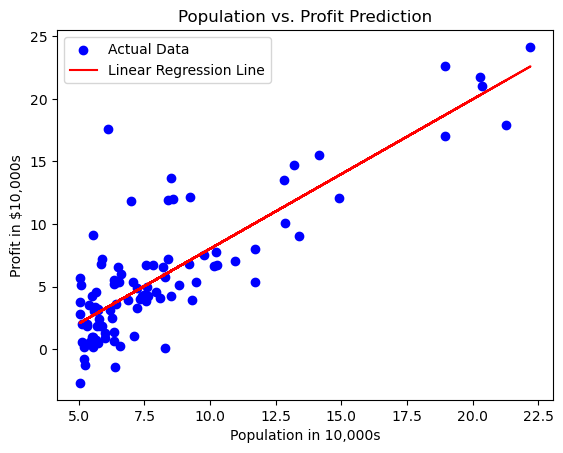

In [37]:
plt.scatter(X, y, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(X, sk_predictions, color='red', label='Linear Regression Line')

# Adding title and labels
plt.title('Population vs. Profit Prediction')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()

In [38]:
from sklearn.linear_model import Lasso,Ridge

In [40]:
lasso_model = Lasso(alpha=50,max_iter=500, tol=0.1)
lasso_model.fit(X, y)
lasso_predictions = lasso_model.predict(X)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Lasso Intercept:", lasso_model.intercept_)
print("Lasso MSE:", mean_squared_error(y, lasso_predictions))

# Ridge Regression
ridge_model = Ridge(alpha=50.0,max_iter=500, tol=0.1)
ridge_model.fit(X, y)
ridge_predictions = ridge_model.predict(X)
print("Ridge Regression Coefficients:", ridge_model.coef_[0])
print("Ridge Intercept:", ridge_model.intercept_)
print("Ridge MSE:", mean_squared_error(y, ridge_predictions))

Lasso Regression Coefficients: [0.]
Lasso Intercept: [5.83913505]
Lasso MSE: 30.049969604713656
Ridge Regression Coefficients: [1.15293695]
Ridge Intercept: [-3.56859989]
Ridge MSE: 8.977772111524343


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
sse = np.sum((y - sk_predictions) ** 2)

In [44]:
sse

868.5324469391845

In [45]:
r2=r2_score(y,sk_predictions)

In [46]:
r2

0.7020315537841397